# Shaozhong Xu

## Research question/interests

Briefly describe your research question or interests here.
1. Describe the different between the casual and registered rental usage.
2. How does season impact the rental activity.
3. Which month has most/least rental activity.
4. How does week day impact the rental activity.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Load data

In [2]:
day_df = pd.read_csv("../data/raw/day.csv")

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("../data/raw/hour.csv")

In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# Check day data frame has empty cells

In [8]:
droped_df = day_df.dropna()
len(droped_df) == len(day_df)

True

Conclusion: There is no empty/missing data in the day dataframe

# Check duplication

In [9]:
len(day_df[day_df.duplicated()]) == 0

True

Conclusion: No duplication found

# Clean Data

In [10]:
day_df = day_df.drop(["instant"], axis=1)

## find out outliers

<AxesSubplot:xlabel='cnt'>

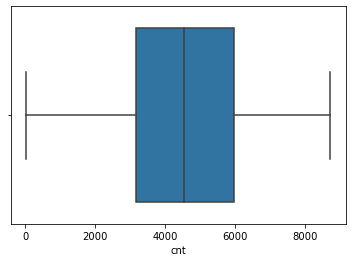

In [11]:
sns.boxplot(x=day_df["cnt"])

<AxesSubplot:xlabel='casual'>

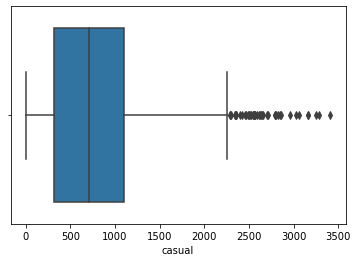

In [12]:
sns.boxplot(x=day_df["casual"])

<AxesSubplot:xlabel='registered'>

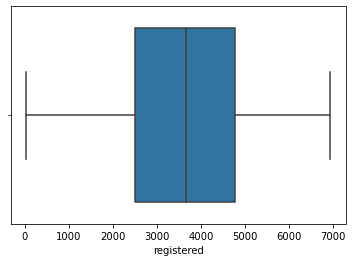

In [13]:
sns.boxplot(x=day_df["registered"])

## Remove outliers

In [14]:
z = np.abs(stats.zscore(day_df["casual"]))
np.where(z > 3)
day_df = day_df[(z < 1.7)]

# Data clean up and Wrangling

In [15]:
from project_functions1 import load_and_process_simplify

In [16]:
df = load_and_process_simplify("../data/raw/day.csv")

# Data overview and description

In [17]:
df. head()

,dteday,season,yr,mnth,holiday,weekday,workingday,casual,registered,cnt
0,2011-01-01,springer,0,1,0,saturday,0,331,654,985
1,2011-01-02,springer,0,1,0,sunday,0,131,670,801
2,2011-01-03,springer,0,1,0,monday,1,120,1229,1349
3,2011-01-04,springer,0,1,0,tuesday,1,108,1454,1562
4,2011-01-05,springer,0,1,0,wednesday,1,82,1518,1600


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,668.0,0.467066,0.499288,0.0,0.00,0.0,1.0,1.0
mnth,668.0,6.491018,3.541772,1.0,3.00,7.0,10.0,12.0
holiday,668.0,0.026946,0.162047,0.0,0.00,0.0,0.0,1.0
workingday,668.0,0.747006,0.435053,0.0,0.00,1.0,1.0,1.0
casual,668.0,690.787425,466.885216,2.0,280.25,664.5,992.5,2006.0
registered,668.0,3593.462575,1596.561356,20.0,2410.00,3578.0,4712.0,6946.0
cnt,668.0,4284.250000,1859.105644,22.0,2924.75,4338.5,5496.0,8173.0


# Data Analysis

## 1. Describe the different between the casual and registered rental usage.

In [19]:
df["casual"].describe()

count     668.000000
mean      690.787425
std       466.885216
min         2.000000
25%       280.250000
50%       664.500000
75%       992.500000
max      2006.000000
Name: casual, dtype: float64

In [20]:
df["registered"].describe()

count     668.000000
mean     3593.462575
std      1596.561356
min        20.000000
25%      2410.000000
50%      3578.000000
75%      4712.000000
max      6946.000000
Name: registered, dtype: float64

In [21]:
sum(df["casual"])

461446

In [22]:
sum(df["registered"])

2400433

Text(0, 0.5, 'count of days')

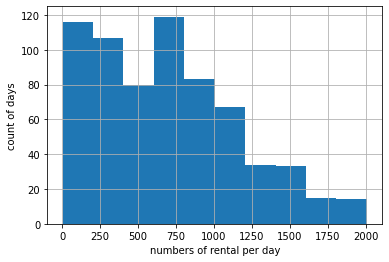

In [23]:
ax = df["casual"].hist()
plt.xlabel("numbers of rental per day")
plt.ylabel("count of days")

Text(0, 0.5, 'count of days')

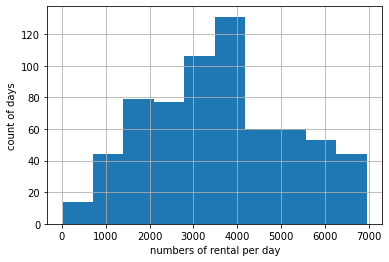

In [24]:
ax = df["registered"].hist()
plt.xlabel("numbers of rental per day")
plt.ylabel("count of days")

### Answer

According to above data and graph:
- Min number of rental usage per day causal vs registered: 2 : 20
- Max number of rental usage per day causal vs registered: 2006 : 6946
- Mean number of rental usage per day causal vs registered: 690 : 3593
- Total number of rental usage causal vs registered: 461446 : 2400433
- Causal usage: maxium 750/day 120 days
- Registered usage: maxium 4000/day over 120 days

Conclusion: registered rental activity is much more active than causal, it about 6 times more over all.

## 2. How does season impact the rental activity.

In [25]:
df1 = df.groupby("season", as_index=False).sum()[["season","casual", "registered", "cnt"]]

Text(0, 0.5, 'Total rental count')

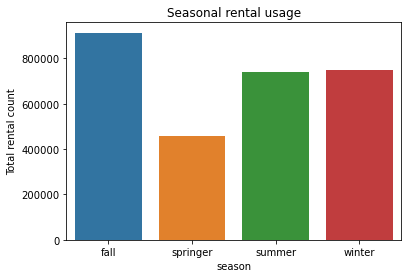

In [26]:
plt.title("Seasonal rental usage")
sns.barplot(data=df1,x="season",y="cnt")
plt.ylabel("Total rental count")

### Answer

1. Fall has the most rental activities over 800,000
2. Springer has the least rental activies
3. Summer and Winter are same

## 3. Which month has most/least rental activity.

In [27]:
df1 = df.groupby(["yr","mnth"], as_index=False).sum()

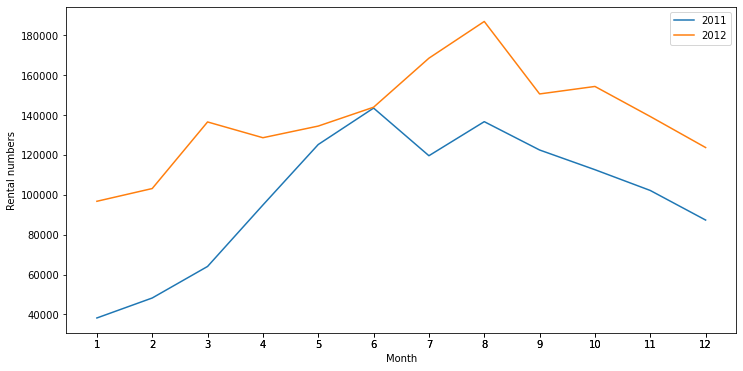

In [28]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df1, x="mnth", y="cnt", hue="yr")
plt.xlabel("Month")
plt.xticks(df1["mnth"])
plt.ylabel("Rental numbers")
legend = plt.legend()
legend.get_texts()[0].set_text('2011')
legend.get_texts()[1].set_text('2012')


### Answer

- 2012 has higher rentals than 2011
- The most rentals happens in June in 2011, the number is 143512
- The most rentals happend in Augest in 2012, the number is 186971

## 4. How does week day impact the rental activity.

In [29]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,casual,registered,cnt
0,2011-01-01,springer,0,1,0,saturday,0,331,654,985
1,2011-01-02,springer,0,1,0,sunday,0,131,670,801
2,2011-01-03,springer,0,1,0,monday,1,120,1229,1349
3,2011-01-04,springer,0,1,0,tuesday,1,108,1454,1562
4,2011-01-05,springer,0,1,0,wednesday,1,82,1518,1600


In [30]:
df1 = df.groupby("weekday",as_index=False).sum()[["weekday", "casual", "registered", "cnt"]]

In [31]:
df1 = df1.melt('weekday', var_name='cols', value_name='vals')

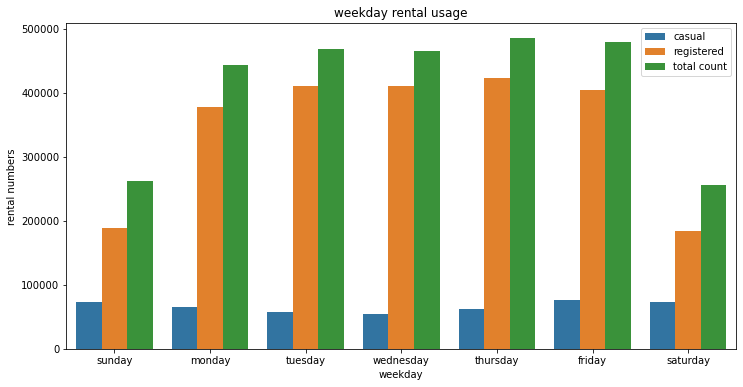

In [32]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df1, x='weekday', y='vals', hue='cols', order=["sunday","monday","tuesday","wednesday","thursday","friday","saturday"])
plt.title("weekday rental usage")
plt.ylabel("rental numbers")
legend = plt.legend()
legend.get_texts()[2].set_text('total count')


### Answer

- Registered rental uses the service less on weekend(Saturday and Sunday), however causcal usages is increased on the weekend
- For registered rentals, weekdays are similar, as same as the causcal rentals. 

# Method Chaining and create process method

In [33]:
data = pd.read_csv("../data/raw/day.csv")

In [34]:
df = data.drop(["instant"],axis=1)

In [35]:
def load_and_process(file_name):
    data = pd.read_csv(file_name)
    df = data.drop(["instant"],axis=1)
    z = np.abs(stats.zscore(df["casual"]))
    df = df[(z < 1.7)]
    return df

In [36]:
df1 = load_and_process("../data/raw/day.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      668 non-null    object 
 1   season      668 non-null    int64  
 2   yr          668 non-null    int64  
 3   mnth        668 non-null    int64  
 4   holiday     668 non-null    int64  
 5   weekday     668 non-null    int64  
 6   workingday  668 non-null    int64  
 7   weathersit  668 non-null    int64  
 8   temp        668 non-null    float64
 9   atemp       668 non-null    float64
 10  hum         668 non-null    float64
 11  windspeed   668 non-null    float64
 12  casual      668 non-null    int64  
 13  registered  668 non-null    int64  
 14  cnt         668 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 83.5+ KB


<AxesSubplot:xlabel='casual'>

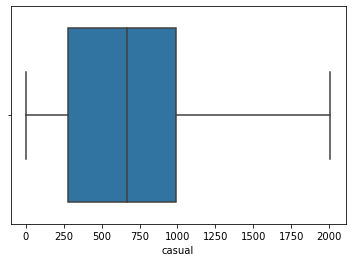

In [37]:
sns.boxplot(x=df1["casual"])

# Milestone 4

## Task1: Process your data for your Tableau Dashboard

1. Remove outliers
2. Remove unused columns
3. export data to data/processed folder

In [38]:
from project_functions1 import load_and_process
df = load_and_process("../data/raw/day.csv")
df = df[["dteday", "season", "weekday", "atemp", "cnt"]]
df.to_csv("../data/processed/day.csv")

In [39]:
df.head()

,dteday,season,weekday,atemp,cnt
0,2011-01-01,1,6,0.363625,985
1,2011-01-02,1,0,0.353739,801
2,2011-01-03,1,1,0.189405,1349
3,2011-01-04,1,2,0.212122,1562
4,2011-01-05,1,3,0.229270,1600


# Task2: Questions

1. Total rental count by seasons, and which season has most rentals
2. Day rental usage and which day has the most rendtals
3. Rental trends by week days
4. Does temperature impact rentals?

The answer for above 4 questions after building a Tableau dashboard
1. The total rental count by seasons:

|Season|Count|
|----|----|
|Springer|457,620 |
|Summer| 741,893|
|Fall| 912,891|
|Winter|749,475 |

Fall has the most rental count

2. The most rental happens on 2012-7-25, the number is 8173

3. Sunday and Saturday has less rentals, and Thursday has the most rentals.

4. There is relationship between Temperature and Rental counts, higher temperature more rentals per day, however, if temperature is too high, the rental count is dropped.